# **Project Title: Job Offer Prediction Based on Resume**

### **Project Description :-**
#### **This project employs logistic regression to predict student placement outcomes based on academic performance and work experience. By analyzing features like secondary and higher secondary percentages, degree scores, employability test results, and MBA scores, the model determines the likelihood of a student being placed. The project encompasses data preprocessing, exploratory data analysis, model training, evaluation, and visualization, providing insights into the key determinants of student placements.**

#### **Objective: Predict whether a student will be placed or not based on their academic and experiential attributes.**

### **Step 1 : Import Libraries**

* **pandas**: Used for data manipulation and analysis, offering powerful data structures like DataFrames to handle and process structured data efficiently.
* **numpy**: Provides support for numerical operations on large multi-dimensional arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
* **matplotlib.pyplot**: Used for cremating static, interactive, and animated visualizations in Python, enabling plotting of various graphs such as line charts, scatter plots, and histograms.
* **seaborn**: A data visualization library built on matplotlib, providing a high-level interface to create statistical graphics such as heatmaps, pair plots, and box plots.
* **sklearn.model_selection**:
    * **train_test_split**: Splits the dataset into training and testing sets, ensuring an appropriate balance for model training and validation.
* **sklearn.preprocessing**:
  * **StandardScaler**: Standardizes features by removing the mean and scaling to unit variance, ensuring all features contribute equally to the model.
  * **OneHotEncoder**: Converts categorical variables into a binary matrix (dummy variables), enabling models to interpret non-numerical features.
* **sklearn.linear_model**:
  * **LogisticRegression**:Logistic Regression is a statistical model used for binary or multiclass classification that predicts the probability of a class using a logistic (sigmoid) function..
* **sklearn.metrics**:
  * **mean_squared_error (MSE)**: Measures the average squared difference between actual and predicted values, penalizing large errors.
  * **mean_absolute_error (MAE)**: Computes the average absolute difference between actual and predicted values, giving equal weight to all errors.
  * **r2_score (R²)**: Indicates how well the model fits the data, representing the proportion of variance explained by the model.
* **classification_report**: Used to generate a detailed performance report for classification models.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### **Step 2 :Load  the Dataset**

In [5]:
# Load the dataset
df = pd.read_csv('Placement_Data_Full_Class.csv')
df




,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


### **Step 3 : Exploratory Data Analysis (EDA)**

In [9]:
# Displaying first few rows
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [11]:
# Checking for missing values
df.isnull().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [91]:
df.describe()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,0.646512,67.303395,0.460465,66.333163,0.609302,1.372093,66.370186,0.600000,0.344186,72.100558,0.441860,62.278186,0.688372
std,0.479168,10.827205,0.499598,10.897509,0.489045,0.580978,7.358743,0.890238,0.476211,13.275956,0.497767,5.833385,0.464240
min,0.000000,40.890000,0.000000,37.000000,0.000000,0.000000,50.000000,0.000000,0.000000,50.000000,0.000000,51.210000,0.000000
25%,0.000000,60.600000,0.000000,60.900000,0.000000,1.000000,61.000000,0.000000,0.000000,60.000000,0.000000,57.945000,0.000000
50%,1.000000,67.000000,0.000000,65.000000,1.000000,1.000000,66.000000,0.000000,0.000000,71.000000,0.000000,62.000000,1.000000
75%,1.000000,75.700000,1.000000,73.000000,1.000000,2.000000,72.000000,2.000000,1.000000,83.500000,1.000000,66.255000,1.000000
max,1.000000,89.400000,1.000000,97.700000,1.000000,2.000000,91.000000,2.000000,1.000000,98.000000,1.000000,77.890000,1.000000


In [13]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


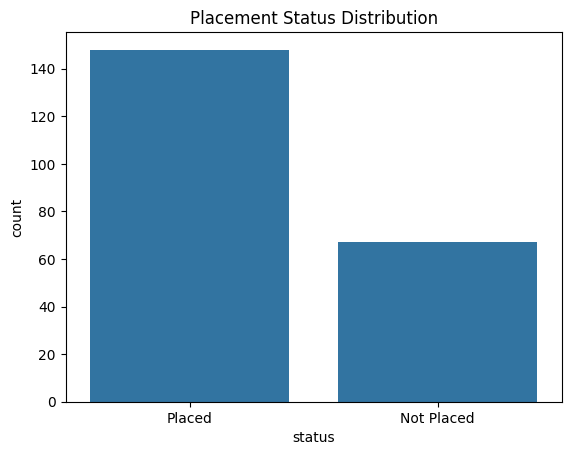

In [17]:
##Placement Status Distribution

sns.countplot(x='status', data=df)
plt.title('Placement Status Distribution')
plt.show()


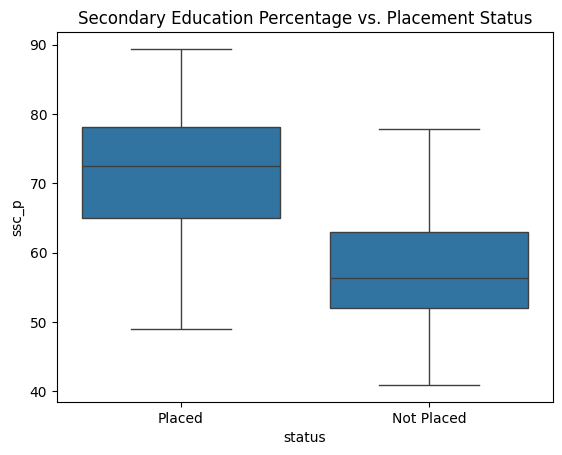

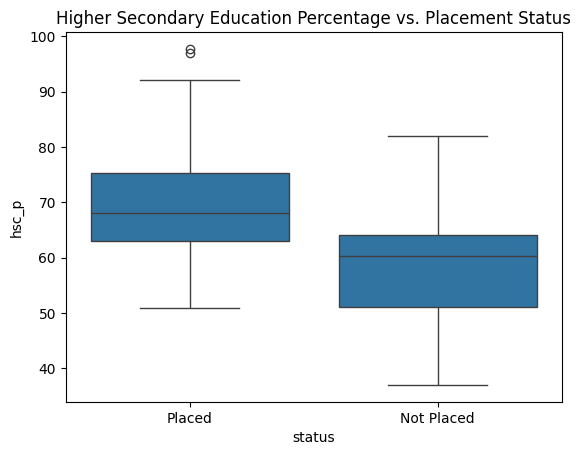

In [23]:
## Academic Performance vs Placement

sns.boxplot(x='status', y='ssc_p', data=df)
plt.title('Secondary Education Percentage vs. Placement Status')
plt.show()


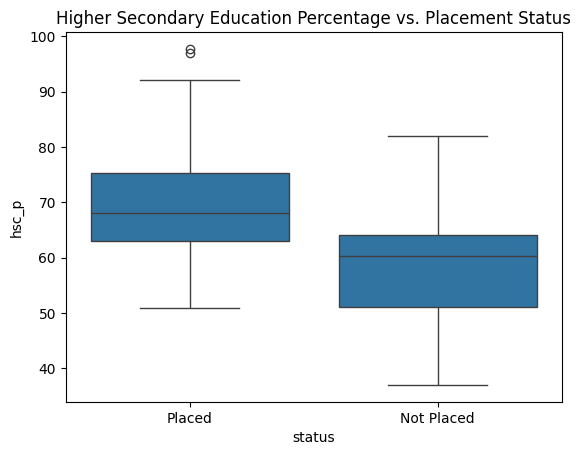

In [27]:
sns.boxplot(x='status', y='hsc_p', data=df)
plt.title('Higher Secondary Education Percentage vs. Placement Status')
plt.show()

In [ ]:
####Correlation Heatmap

In [31]:
# Convert categorical variables to numeric for correlation
data_encoded = df.copy()
label_encoders = {}
for column in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    le = LabelEncoder()
    data_encoded[column] = le.fit_transform(data_encoded[column])
    label_encoders[column] = le

In [33]:
# Compute correlation matrix
corr_matrix = data_encoded.corr()

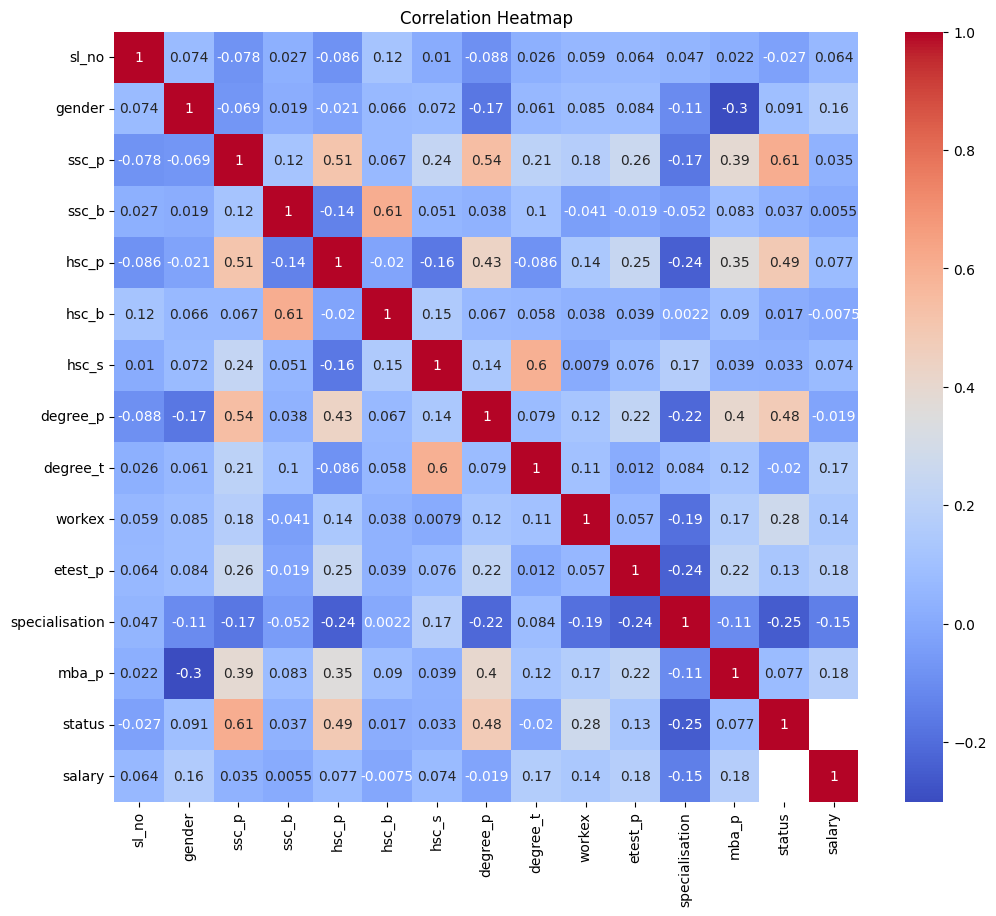

In [35]:
# Plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### **Step 4 :Data Preprocessing**

In [39]:
## Drop Unnecessary Columns
df.drop(['sl_no', 'salary'], axis=1, inplace=True)


In [45]:
# Encode categorical variables
for column in ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']:
    df[column] = LabelEncoder().fit_transform(df[column])


In [ ]:
####Feature Scaling

In [49]:
# Separate features and target
X = df.drop('status', axis=1)
y = df['status']

In [51]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### **Step 5 :Model Building**

In [53]:
##Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [55]:
##Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### **Step 5 :Model Evaluation**

In [57]:
##Predictions and Accuracy
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Accuracy: 0.88


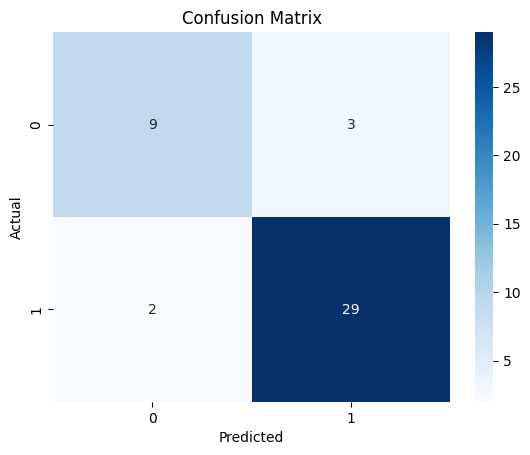

In [87]:
##Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [89]:
####Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78        12
           1       0.91      0.94      0.92        31

    accuracy                           0.88        43
   macro avg       0.86      0.84      0.85        43
weighted avg       0.88      0.88      0.88        43



### **Conclusion:-**
#### **The logistic regression model demonstrates a commendable accuracy in predicting student placements based on academic and experiential data. Key insights include the significance of secondary and higher secondary percentages, as well as employability test scores, in influencing placement outcomes. This model can aid educational institutions in identifying students who may require additional support to enhance their employability.**